In [10]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn
%matplotlib inline

In [2]:
def run_query(q):
    with sqlite3.connect('chinook.db') as conn:
        return pd.read_sql_query(q, conn)
    
def run_command(comm):
    with sqlite3.connect('chinook.db') as conn:
        conn.isolation_level = None
        conn.cursor.execute(comm).fetchall()

def show_tables():
    q = """
    SELECT 
        name,
        type
    FROM sqlite_master
    WHERE type IN ("table", "view")
    """
    return run_query(q)
    

In [3]:
show_tables()

,name,type
0,album,table
1,artist,table
2,customer,table
3,employee,table
4,genre,table
5,invoice,table
6,invoice_line,table
7,media_type,table
8,playlist,table
9,playlist_track,table


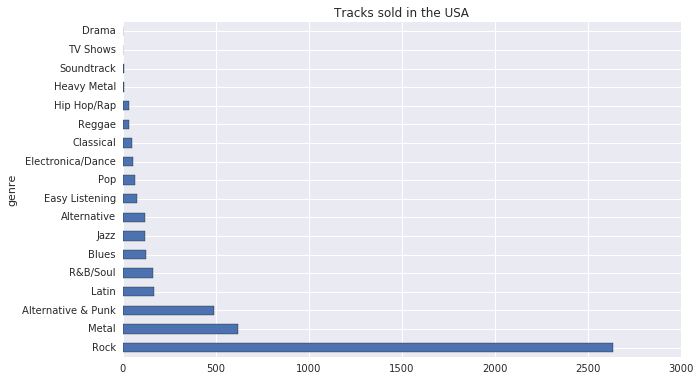

In [67]:
tracks_statistics = """
SELECT 
    g.name genre, 
   COUNT(il.invoice_line_id) sold_tracks,
   CAST(COUNT(il.invoice_line_id) as Float)/(SELECT COUNT(*) FROM invoice_line)\
   sold_persent    
FROM invoice_line il
INNER JOIN track t ON t.track_id = il.track_id
INNER JOIN genre g On g.genre_id = t.genre_id
GROUP BY genre
ORDER BY sold_tracks DESC
"""

tracks_stat =run_query(tracks_statistics)
tracks_stat.set_index("genre", inplace=True, drop=True)
tracks_stat["sold_tracks"].plot.barh(figsize=(10,6),title="Tracks sold in the USA", xlim=(0, 3000))


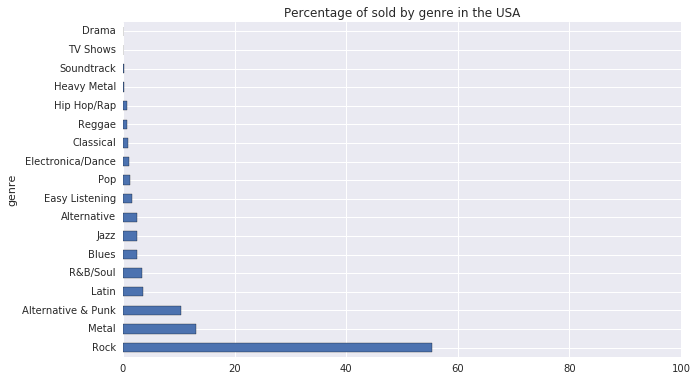

In [66]:
(tracks_stat["sold_persent"] * 100 ).plot.barh(figsize=(10,6),title="Percentage of sold by genre in the USA", xlim=(0,100))

Rock is the most popular genre of music of this dataset. Next goes metal. 
Unfortunately I can't say that Rock is the most popular genre in U.S. To say so we must
gather all data by at least one year of one or many massive and popular music stores.
We judje by label, not store that means there's  a probability that this label got strong and popular
rock and metal bands and less popular others. 

In [ ]:
print('hi')